In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Housing.csv')
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Removing Outliers

In [19]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean


In [21]:
numeric_cols = ['price', 'area']
df_no_outliers = remove_outliers_iqr(df, numeric_cols)

print(f"Original data size: {df.shape}")
print(f"Data size after removing outliers: {df_no_outliers.shape}")

Original data size: (545, 13)
Data size after removing outliers: (517, 13)


In [22]:
X = df_no_outliers.drop('price',axis=1)
X.head(3)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8500,3,2,4,yes,no,no,no,yes,2,no,furnished


In [35]:
Y=df_no_outliers['price']
Y.head(3)

15    9100000
16    9100000
17    8960000
Name: price, dtype: int64

In [24]:
categorical_cols = df_no_outliers.select_dtypes(include=['object']).columns

### OneHotEncoding for Categorical columns

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)

X_numerical = X.drop(columns=categorical_cols)
X_final = pd.concat([X_numerical, encoded_df], axis=1)
X_final.head(3)

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,6000,4,1,2,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
16,6600,4,2,2,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
17,8500,3,2,4,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Standardization of Numerical columns

In [31]:
from sklearn.preprocessing import StandardScaler
scaler_area = StandardScaler()
X_final['area'] = scaler_area.fit_transform(X_final[['area']])
X_final.describe()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,5.170000e+02,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,1.099486e-16,2.941973,1.261122,1.794971,0.653772,0.851064,0.177950,0.346228,0.042553,0.307544,0.216634,0.415861,0.338491
std,1.000969e+00,0.731701,0.465368,0.865205,0.843380,0.356370,0.382841,0.476228,0.202043,0.461923,0.412350,0.493347,0.473655
min,-1.822895e+00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.708274e-01,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.194762e-01,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.525588e-01,3.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,3.077379e+00,6.000000,3.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
scaler_price = StandardScaler()
Y_scaled = scaler_price.fit_transform(Y.to_frame())
Y_scaled = pd.Series(Y_scaled.flatten(), index=Y.index)
Y_scaled.head(3)

15    2.843893
16    2.843893
17    2.756024
dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_scaled, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [47]:
y_test_orig = scaler_price.inverse_transform(y_test.to_frame())
y_test_orig = pd.Series(y_test_orig.flatten(), index=y_test.index)
y_pred_reshaped = y_pred.reshape(-1, 1)
y_pred_orig = scaler_price.inverse_transform(y_pred_reshaped)
y_pred_orig = pd.Series(y_pred_orig.flatten())

### Evaluating Metrics on Unstandardized data

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test_orig, y_pred_orig)
mse = mean_squared_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 734127.11
MSE: 954173744480.89
R² Score: 0.67


### Evaluating Metrics on Standardized data

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 0.46
MSE: 0.38
R² Score: 0.67


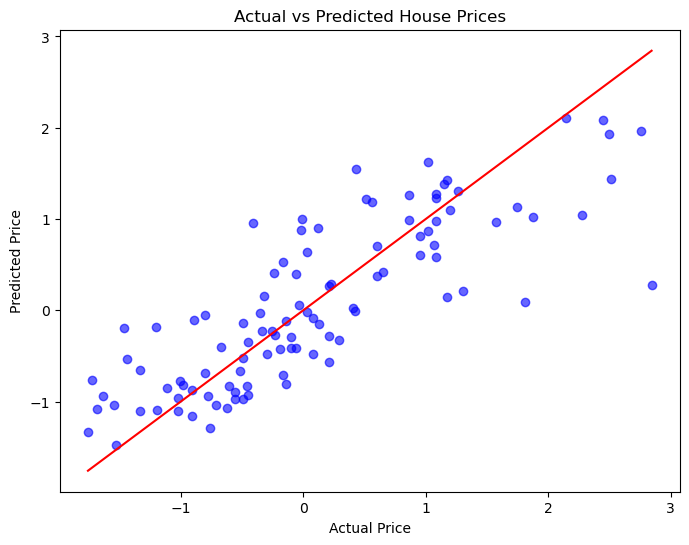

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

In [51]:
coef_df = pd.DataFrame({
    'Feature': X_final.columns,
    'Coefficient': model.coef_
})
print(coef_df)

                            Feature  Coefficient
0                              area     0.274739
1                          bedrooms     0.062559
2                         bathrooms     0.439392
3                           stories     0.288409
4                           parking     0.134540
5                      mainroad_yes     0.244371
6                     guestroom_yes     0.261799
7                      basement_yes     0.194550
8               hotwaterheating_yes     0.435750
9               airconditioning_yes     0.544649
10                     prefarea_yes     0.322486
11  furnishingstatus_semi-furnished    -0.001568
12     furnishingstatus_unfurnished    -0.170259
